In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, path="data")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [6]:
word_indices = imdb.get_word_index()
word_dict_inversed = dict(
    [(value, key) for (key,value) in word_indices.items()]
)
word_0 = " ".join([word_dict_inversed.get(i-3,"|reserved|") for i in train_data[0]])
word_0

"|reserved| this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert |reserved| is an amazing actor and now the same being director |reserved| father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for |reserved| and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also |reserved| to the two little boy's that played the |reserved| of norman and paul they were just brilliant children are often left out of the |reserved| list i think because the stars that play them all grown up are such a big profile for the whole film but these children are ama

In [8]:
import numpy as np
def vectorized_sequence(sequences, dimension = 10000):
    result = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            result[i, j] = 1
    return result

X_train = vectorized_sequence(train_data)
X_test = vectorized_sequence(test_data)

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32") 

In [62]:
from tensorflow.keras import layers

In [146]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [147]:
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy",
              metrics=["accuracy"])
              

In [148]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [149]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    batch_size=512,
                    epochs=6,
                    validation_data = (X_val, y_val))

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6151 - loss: 0.6556 - val_accuracy: 0.8511 - val_loss: 0.5184
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8654 - loss: 0.4572 - val_accuracy: 0.8736 - val_loss: 0.3814
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9043 - loss: 0.3284 - val_accuracy: 0.8802 - val_loss: 0.3254
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9222 - loss: 0.2521 - val_accuracy: 0.8691 - val_loss: 0.3160
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9339 - loss: 0.2094 - val_accuracy: 0.8889 - val_loss: 0.2779
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9427 - loss: 0.1794 - val_accuracy: 0.8888 - val_loss: 0.2774


In [150]:
history_dict = history.history
history_dict.keys()
history_params = history.params
history_params

{'verbose': 'auto', 'epochs': 6, 'steps': 30}

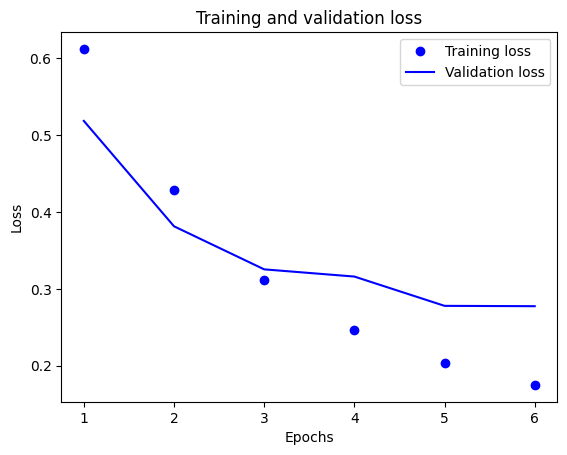

In [151]:
loss_values = history_dict["loss"]
loss_val_values = history_dict["val_loss"]
epochs = range(1, history_params["epochs"]+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, loss_val_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


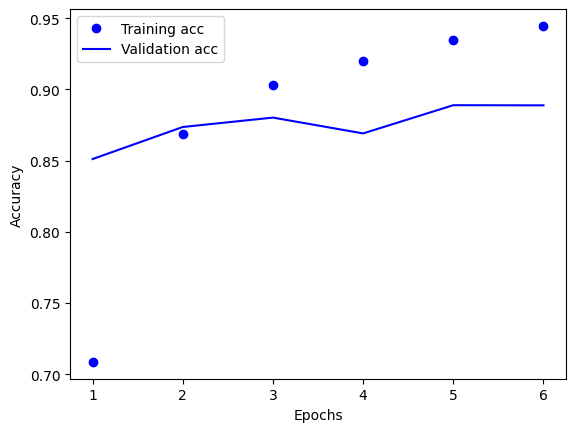

In [152]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [153]:
results = model.evaluate(X_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8787 - loss: 0.2949


[0.2941132187843323, 0.8809999823570251]

In [154]:
predictions = model.predict(X_test)
predictions

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.23528774],
       [0.99951607],
       [0.9167529 ],
       ...,
       [0.0843116 ],
       [0.12008516],
       [0.5023602 ]], dtype=float32)